# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

test = pd.read_csv('/Users/joohyun/Desktop/Projects/bike-sharing-demand/test.csv')
train = pd.read_csv('/Users/joohyun/Desktop/Projects/bike-sharing-demand/train.csv')

In [2]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Data Fields
* datetime - hourly date + timestamp
* season 
    - 1 = spring
    - 2 = summer
    - 3 = fall
    - 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

# Preprocessing 'datetime' column

In [4]:
train['datetime2'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime2'].dt.year
train['month'] = train['datetime2'].dt.month
train['day'] = train['datetime2'].dt.day
train['hour'] = train['datetime2'].dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime2,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4


# EDA

## 1. The relationship between numerical variables and rental count

numerical variables
1. temp
2. atemp
3. humidity
4. windspeed

### a) Plotting the distribution of count using Heatmap

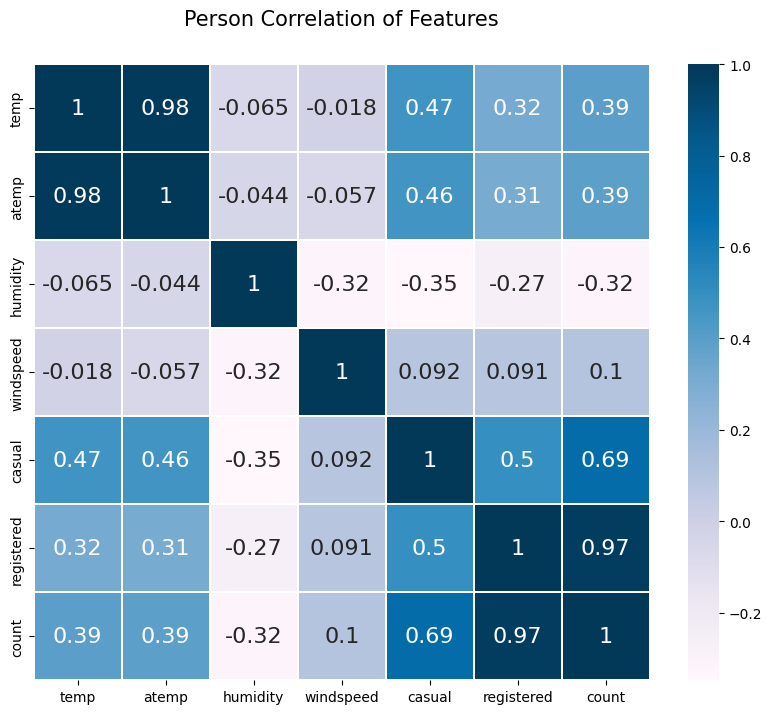

In [6]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)  
sns.heatmap(train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(),  linewidths = 0.1, vmax = 1.0 ,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

### b) Plotting distribution of count using scatterplots

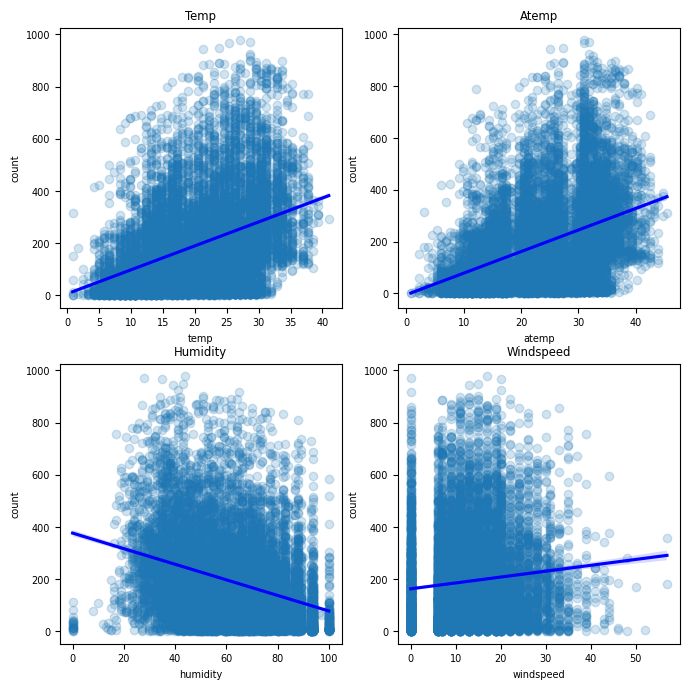

In [7]:
plt.rc('font', size = 7)
fig, axs = plt.subplots(2,2, figsize=(8, 8))
ax1, ax2, ax3, ax4 = axs.flatten()

axs1 = sns.regplot(x='temp', y='count', data=train, ax=ax1, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})
axs2 = sns.regplot(x='atemp', y='count', data=train, ax=ax2, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})
axs3 = sns.regplot(x='humidity', y='count', data=train, ax=ax3, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})
axs4 = sns.regplot(x='windspeed', y='count', data=train, ax=ax4, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})

axs1.set_title('Temp')
axs2.set_title('Atemp')
axs3.set_title('Humidity')
axs4.set_title('Windspeed')

plt.show()

Analysis
1. `temp`, `atemp` show a weak positive correlation of around 0.4 with the rental count.
2. `humidity` has a slightly negative correlation of around 0.3.
3. `windspeed` has a correlation of about 0.1, so no clear trend is observed.
4. when looking at the scatter plot between `windspeed` and `count`, many of the values are concentrated at 0.

### c) Plotting distribution of count using boxplots

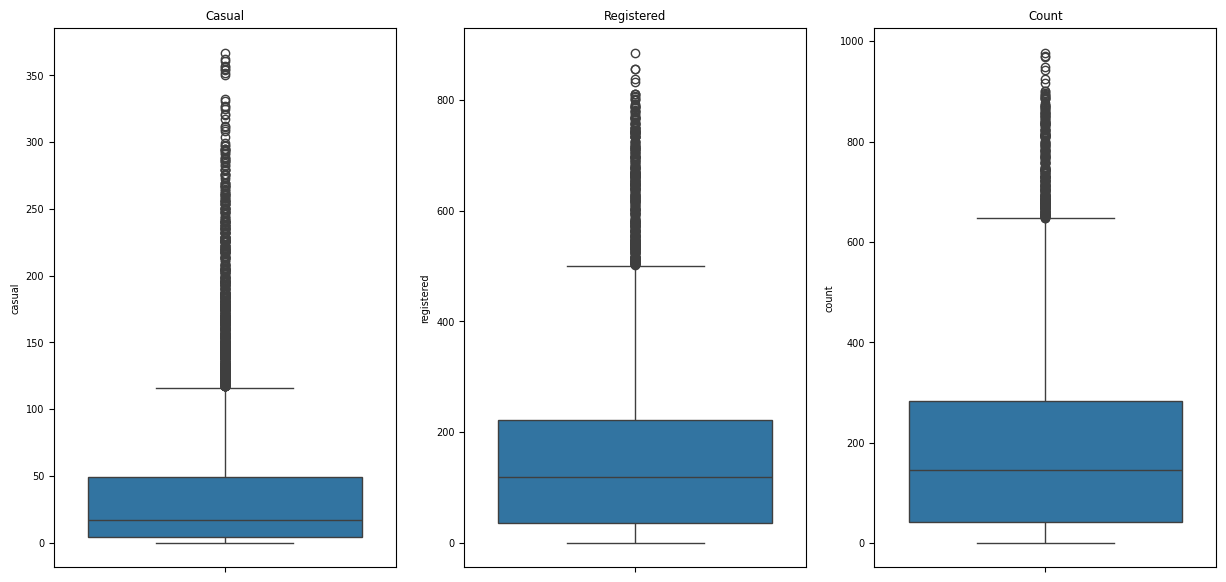

In [8]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7))

sns.boxplot(y = 'casual', data = train, ax = ax1)
sns.boxplot(y = 'registered', data = train, ax = ax2)
sns.boxplot(y = 'count', data = train, ax = ax3)

ax1.set_title('Casual')
ax2.set_title('Registered')
ax3.set_title('Count')

plt.show()

Analysis
1. casual users had stronger correlations with all four variables than registered users.

## 2. The relationship Between Categorical Variables and Rental Count

categorical variables
1. datetime
2. weather
3. season
4. workingday and holiday

### a) `count` vs. `datetime`

/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/1708546970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs1 = sns.barplot(x = 'year', y = 'count', data = train, ax=ax1, palette="hls")
/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/1708546970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs2 = sns.barplot(x = 'month', y = 'count', data = train, ax=ax2, palette="hls")
/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/1708546970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs3 = sns.barplot(x = 'day', y = 'c

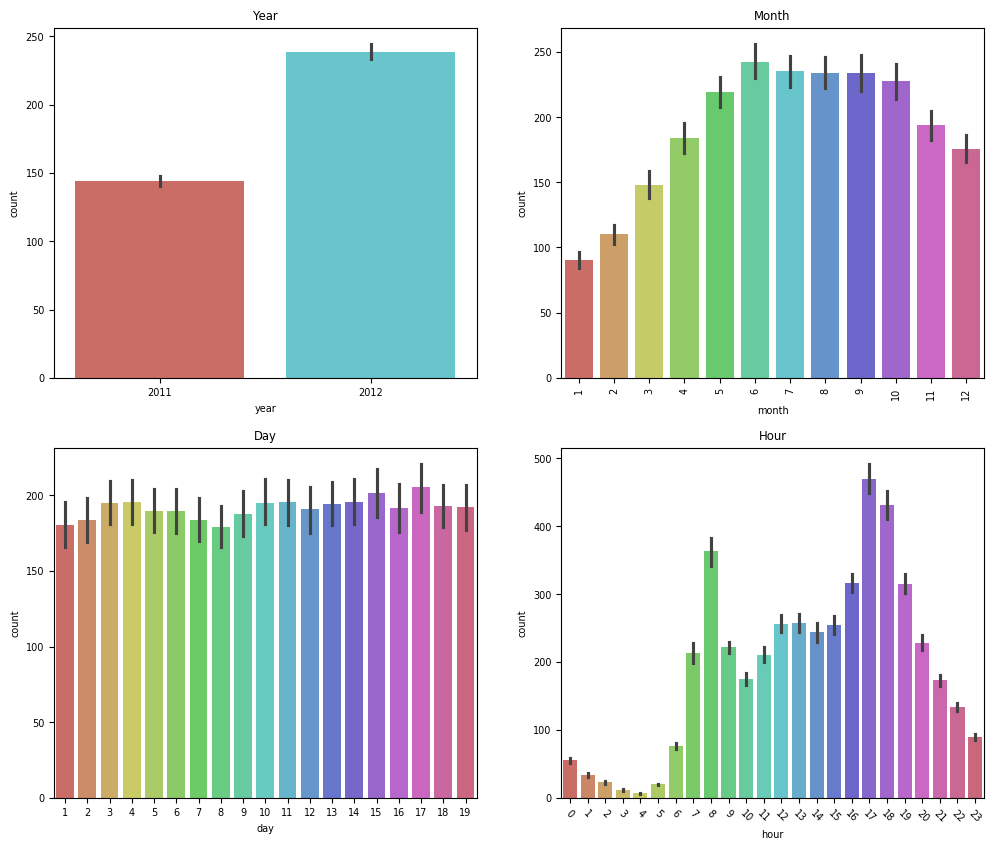

In [9]:

fig, axs = plt.subplots(2,2, figsize=(12, 10))
ax1, ax2, ax3, ax4 = axs.flatten()

# y axis = count
axs1 = sns.barplot(x = 'year', y = 'count', data = train, ax=ax1, palette="hls") 
axs2 = sns.barplot(x = 'month', y = 'count', data = train, ax=ax2, palette="hls")
axs3 = sns.barplot(x = 'day', y = 'count', data = train, ax=ax3, palette="hls")
axs4 = sns.barplot(x = 'hour', y = 'count', data = train, ax=ax4, palette="hls")

axs1.set_title('Year')
axs2.set_title('Month')
axs3.set_title('Day')
axs4.set_title('Hour')

axs2.tick_params(axis = 'x', labelrotation = 90) 
axs4.tick_params(axis = 'x', labelrotation = -45) 


plt.show()

Analysis
1. `year`: The average rental count in 2012 is higher compared to 2011.
2. `month`: June shows the highest average rental count. Overall, rental counts are high from May to October.
3. `day`: No significant difference observed → should be eliminated
4. `hour`: \
    a) Rental counts are unusually high around 8 AM and 5–6 PM, which are commuting hours. \
    b) the number of rentals per hour seems to be mostly around 150 to 200

### b) `count` vs. `weather`

In [10]:
(train.groupby('weather')[['datetime']].count() / len(train))*100

,datetime
weather,
1,66.066507
2,26.033437
3,7.890869
4,0.009186


/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/470696146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs1 = sns.barplot(x = 'weather', y = 'casual', data=wc_train, ax = ax1, palette = 'tab10')
/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/470696146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs2 = sns.barplot(x = 'weather', y = 'registered', data=wr_train, ax = ax2, palette = 'tab10')
/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/470696146.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs3 = sns.ba

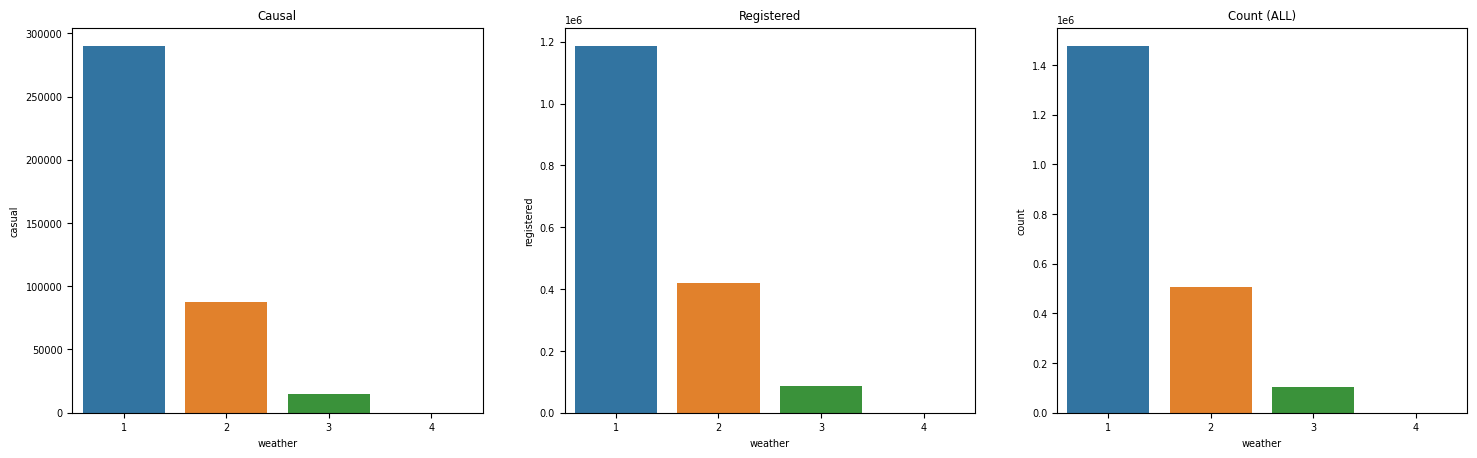

In [11]:
w_train = train.groupby('weather')[['count']].sum().reset_index()
wc_train = train.groupby('weather')[['casual']].sum().reset_index()
wr_train = train.groupby('weather')[['registered']].sum().reset_index()

fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1, ax2, ax3 = axs.flatten()

axs1 = sns.barplot(x = 'weather', y = 'casual', data=wc_train, ax = ax1, palette = 'tab10')
axs2 = sns.barplot(x = 'weather', y = 'registered', data=wr_train, ax = ax2, palette = 'tab10')
axs3 = sns.barplot(x = 'weather', y = 'count', data=w_train, ax = ax3, palette = 'tab10')

axs1.set_title('Causal')
axs2.set_title('Registered')
axs3.set_title('Count (ALL)')

plt.show()

### c) `count` vs. `season`

/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/203246306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs1 = sns.barplot(x = 'season', y = 'casual', data=train, ax = ax1, palette = 'tab10')
/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/203246306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs2 = sns.barplot(x = 'season', y = 'registered', data=train, ax = ax2,  palette = 'tab10')
/var/folders/4g/0vvlnkj5001gsv9m5yfj30g80000gn/T/ipykernel_15082/203246306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs3 = sns.barplot(x 

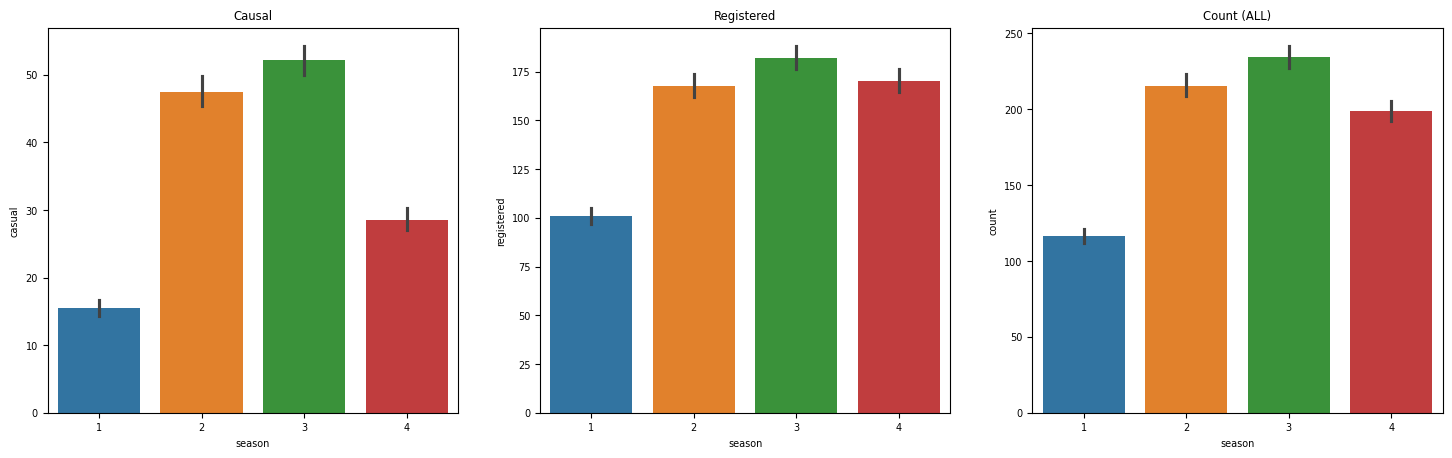

In [12]:
fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1, ax2, ax3 = axs.flatten()

axs1 = sns.barplot(x = 'season', y = 'casual', data=train, ax = ax1, palette = 'tab10')
axs2 = sns.barplot(x = 'season', y = 'registered', data=train, ax = ax2,  palette = 'tab10')
axs3 = sns.barplot(x = 'season', y = 'count', data=train, ax = ax3, palette = 'tab10')

axs1.set_title('Causal')
axs2.set_title('Registered')
axs3.set_title('Count (ALL)')

plt.show()

Analysis
1. Summer and Fall had the highest average rental counts. However, `casual` and `registered` show different patterns.
2. During Spring and Winter, the average reservations of `registered` users were higher than those of `casual` users.

### **Questions to Answer**
1. If the usage patterns of casual and registered users are significantly different, how about predicting them separately? \
In other words, instead of using only count as the target, predict casual and registered separately and then combine the results.
2. `season` and `month` are similar variables. \
Since season is essentially a grouping of every three months, it’s a derived form of month.
Because these are similar variables, including both in a machine learning model could hurt performance, so removing one of them might be beneficial.


### **Sorting the data on `workingday` and `holiday` and Creating `day_type`**

* workingday:
    - 1 → Weekday
    - 0 → Weekend or holiday
* holiday:
    - 1 → Public holiday
    - 0 → Weekday or weekend

* (holiday, workingday): 
    - (1,0) → Public holiday
    - (0,1) → Weekday
    - (0,0) → Weekend

In [13]:
# creating new column for day type
train['day_type'] = 'weekend'
is_holi = (train['holiday'] == 1)
is_week = (train['workingday'] == 1)

train.loc[(is_holi), 'day_type'] = 'holiday'
train.loc[(is_week), 'day_type'] = 'workingday'
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime2,year,month,day,hour,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,weekend
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,weekend
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,weekend
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,weekend
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,weekend


In [14]:
# creating different dataframe for each type
h1 = train.loc[train['day_type'] == 'workingday']
h2 = train.loc[train['day_type'] == 'weekend']
h3 = train.loc[train['day_type'] == 'holiday']

### d) `hour` vs. `workingday`

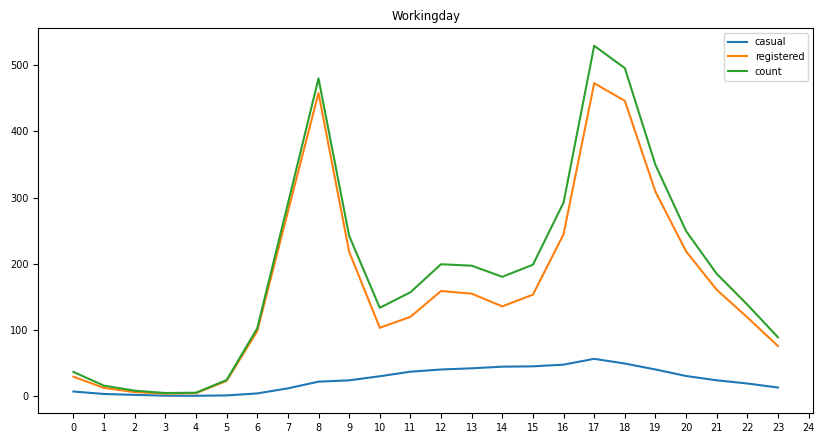

In [15]:
h1_df = h1.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h1_df)
plt.xticks(np.arange(0, 25))
plt.legend(h1_df.columns)
plt.title('Workingday')
plt.show()

Analysis
1. the number of `registered` users is usually higher. The graph shape perfectly aligns with commuting hours.
2. It typically starts increasing from 6 AM, peaks around 8 AM, then starts increasing again from 4 PM and reaches another peak around 5–6 PM.

### e) `hour` vs. `weekend`

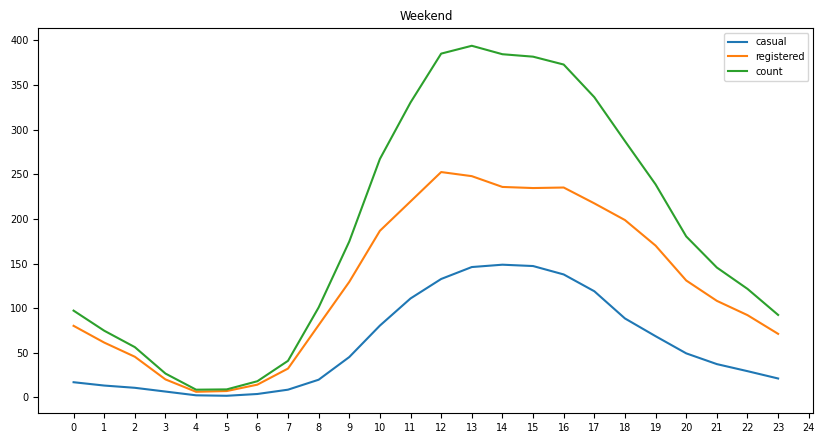

In [16]:
h2_df = h2.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h2_df)
plt.xticks(np.arange(0, 25))
plt.legend(h2_df.columns)
plt.title('Weekend')
plt.show()

Analysis
1.  the number of casual rentals tends to be higher than on weekdays.
2.  usage starts increasing around 7 AM, with the highest rental volume between 12 PM and 4 PM.
3. the overall shape of the graph is similar for both casual and registered users.

### f) `hour` vs. `holiday`

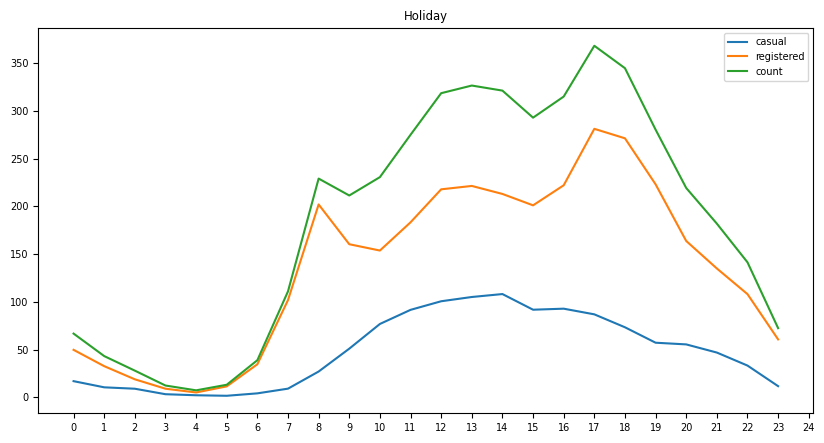

In [17]:
h3_df = h3.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h3_df)
plt.xticks(np.arange(0, 25))
plt.legend(h3_df.columns)
plt.title('Holiday')
plt.show()

### g) `hour` vs. `count` of different `day_type`

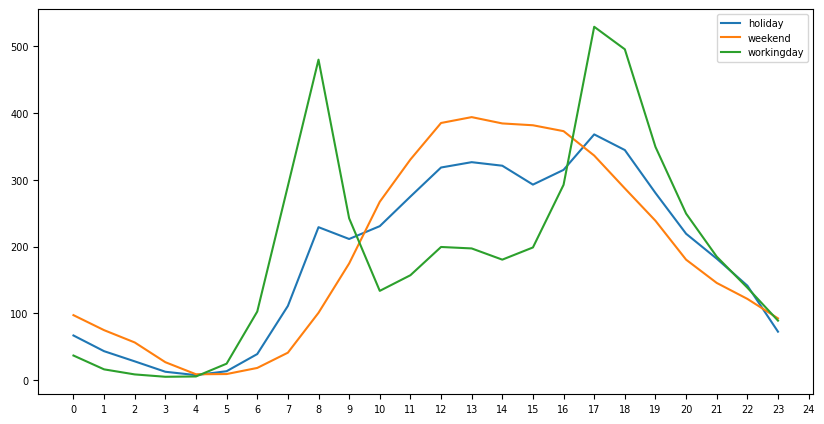

In [18]:
h_all  = train.pivot_table(index = 'hour', columns = 'day_type', values = 'count', aggfunc = 'mean')
plt.figure(figsize = (10, 5))
plt.plot(h_all)
plt.legend(h_all.columns)
plt.xticks(np.arange(0, 25))
plt.show()

Analysis
1. `Weekdays`: Strong concentration during commute hours — 8 AM & 5–6 PM
2. `Weekends` and `holidays`: Heavy usage during the daytime \
    a) Weekends have a slightly higher average usage overall, peaking between 12–4 PM \
    b) On holidays, the peak usage time is more spread out

## 3. The relationship Between Hour and Rental Count

### **Extracting days from datetime**

- 0: Monday
- 1: Tuesday
- 2: Wednesday
- 3: Thursday
- 4: Friday
- 5: Saturday
- 6: Sunday

In [31]:
train['dayofweek'] = train['datetime2'].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime2,year,month,day,hour,day_type,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,weekend,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,weekend,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,weekend,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,weekend,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,weekend,5


### a) `count` vs. `hours` of different `day_type`, `season`, `weather`, and `dayofweek`

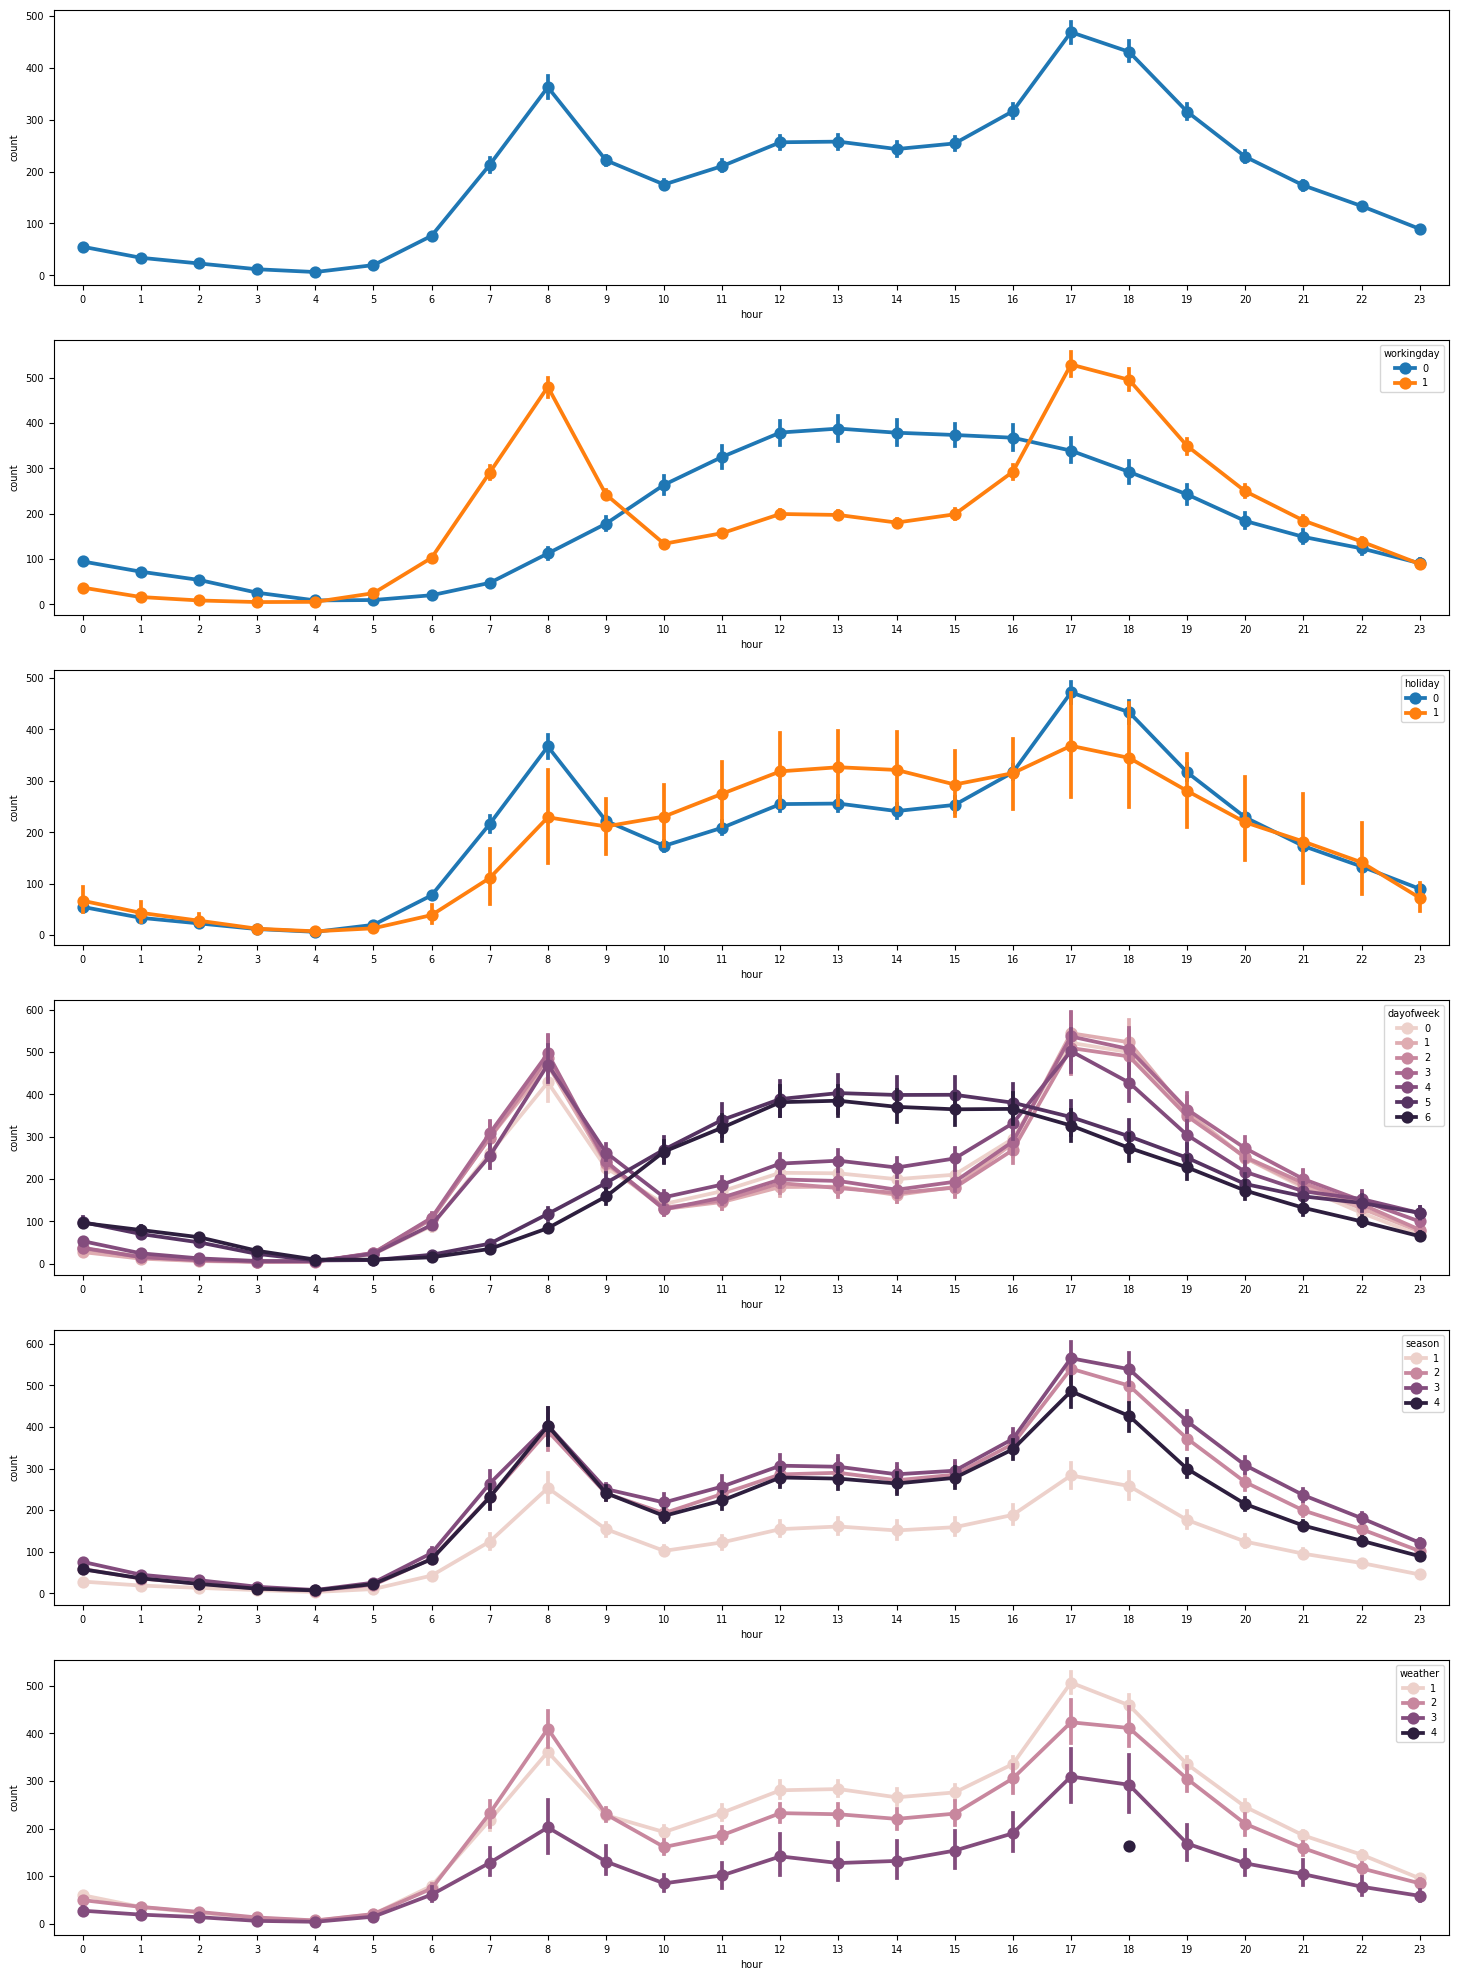

In [20]:
fig, axs = plt.subplots(6, 1, figsize = (18,25))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()

sns.pointplot(x = 'hour', y = 'count', data = train, ax = ax1)
sns.pointplot(x = 'hour', y = 'count', hue = 'workingday', data = train, ax = ax2)
sns.pointplot(x = 'hour', y = 'count', hue = 'holiday', data = train, ax = ax3)
sns.pointplot(x = 'hour', y = 'count', hue = 'dayofweek', data = train, ax = ax4)
sns.pointplot(x = 'hour', y = 'count', hue = 'season', data = train, ax = ax5)
sns.pointplot(x = 'hour', y = 'count', hue = 'weather', data = train, ax = ax6)

plt.show()

Analysis
1. The number of data points by day of the week is similar → Weekdays have more data than weekends and holidays.
2. When plotted by `workingday`, the graph shows a clear distinction between 1 (weekday) and 0 (weekend/holiday).
3. When plotted by `holiday`, the graph appears opposite in color compared to the workingday graph above.
4. When plotted by day of the week, the pattern for 0–4 (weekdays) and 5,6 (weekends) differs significantly.
5. No significant difference in pattern was observed by season and weather.

### b) `casual` vs. `hours` of different `day_type`, `season`, `weather`, and `dayofweek`

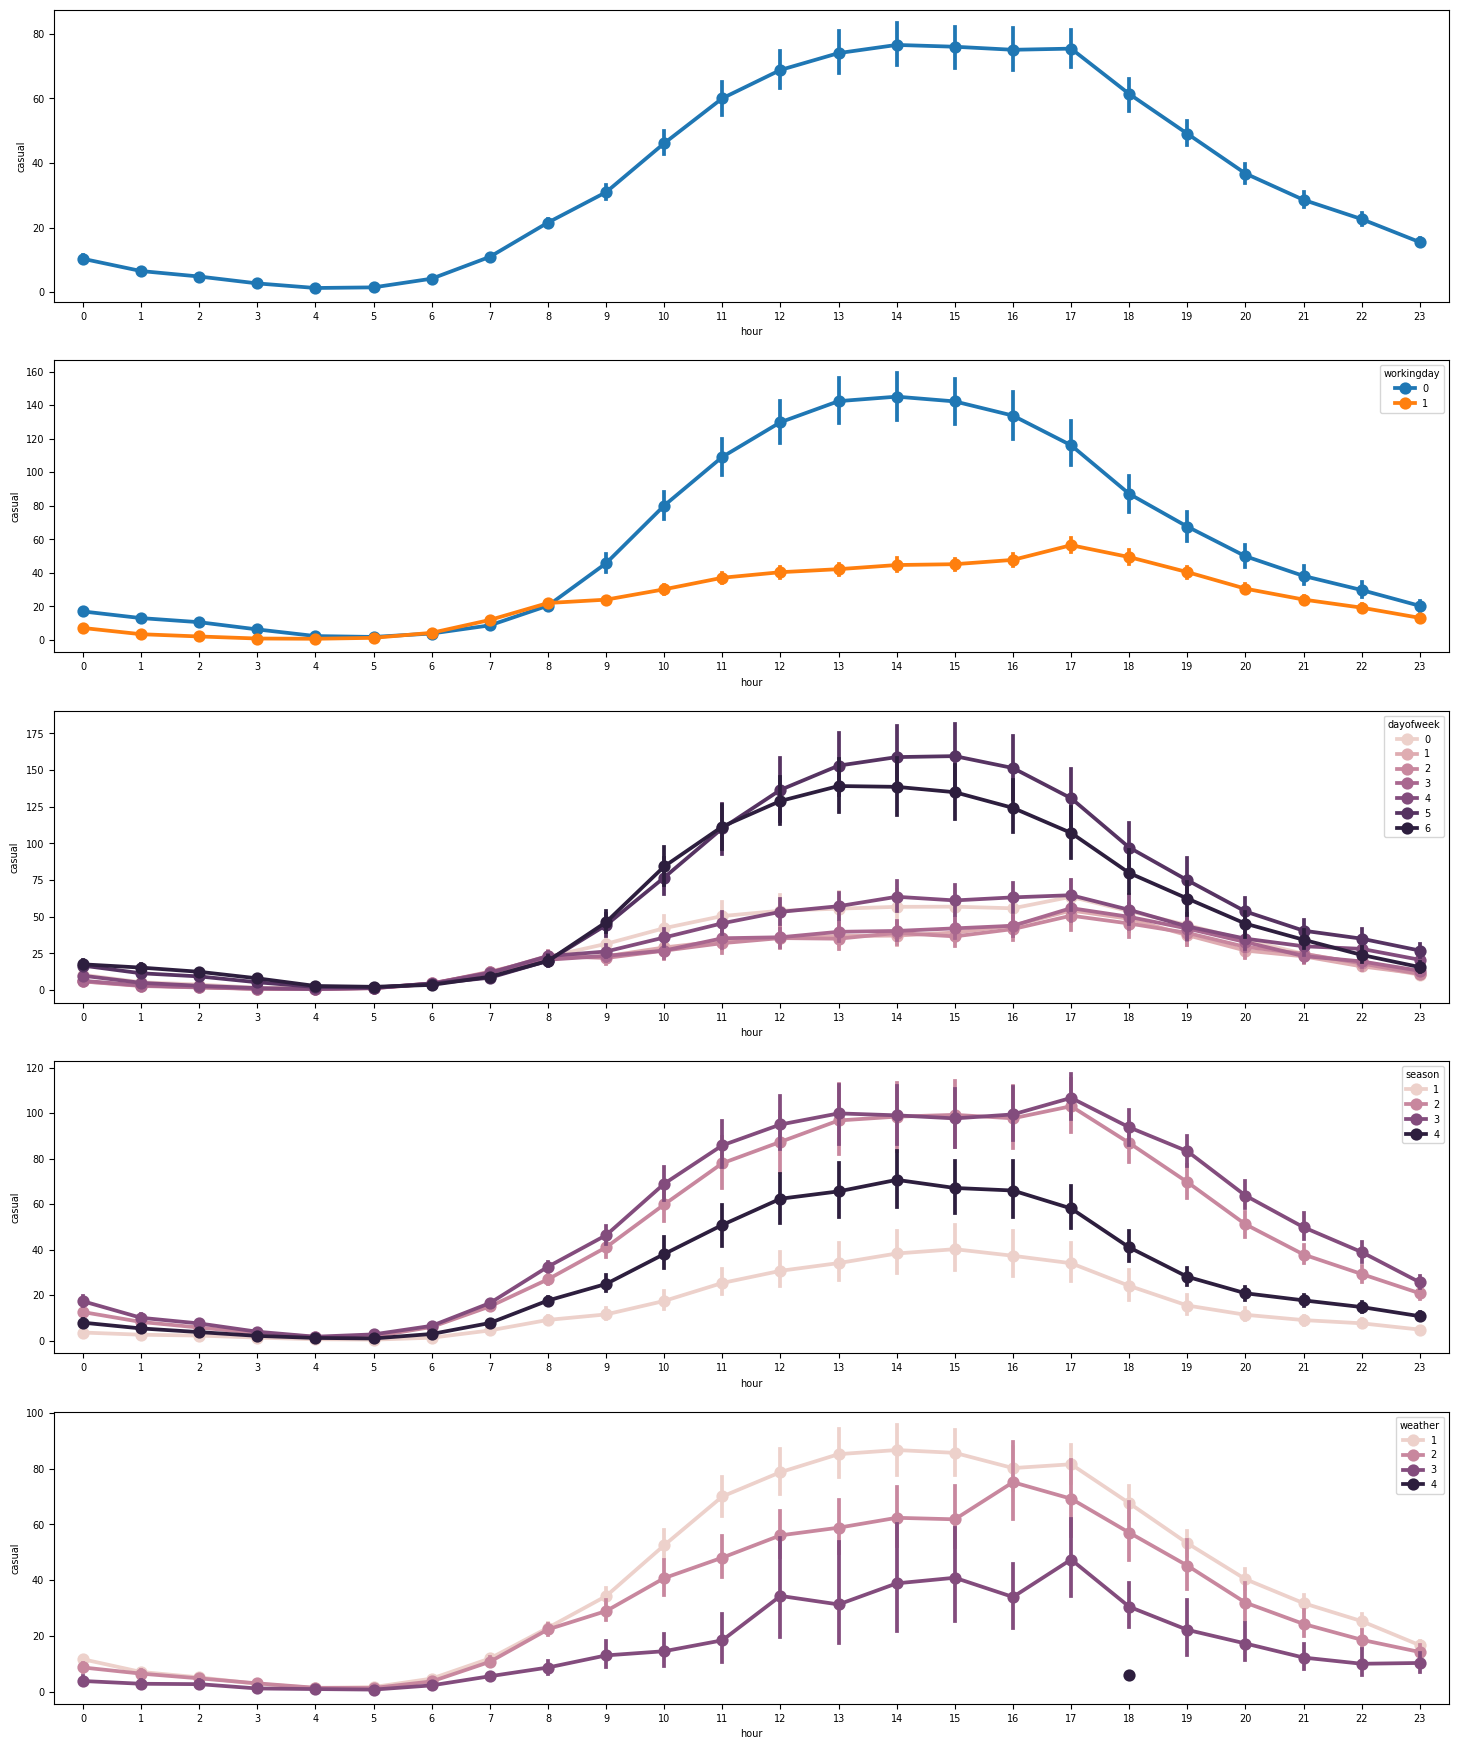

In [21]:
fig, axs = plt.subplots(5, 1, figsize = (18,22))
ax1, ax2, ax3, ax4, ax5 = axs.flatten()

sns.pointplot(x = 'hour', y = 'casual', data = train, ax = ax1)
sns.pointplot(x = 'hour', y = 'casual', hue = 'workingday', data = train, ax = ax2)
sns.pointplot(x = 'hour', y = 'casual', hue = 'dayofweek', data = train, ax = ax3)
sns.pointplot(x = 'hour', y = 'casual', hue = 'season', data = train, ax = ax4)
sns.pointplot(x = 'hour', y = 'casual', hue = 'weather', data = train, ax = ax5)

plt.show()

Analysis
1. the graphs are more similar to `weekend` graphs
2. higher rental counts during daytime

## 4. The relationship Between Hour and Temperature / Humidity / Wind Speed

### a) `count` and `temp`/`atemp` vs. `hours` 

In [22]:
hourtemp_mean = train.groupby(by = 'hour')[['temp', 'atemp']].mean()
hourtemp_mean

,temp,atemp
hour,,
0,19.013187,22.462582
1,18.639648,22.011476
2,18.455491,21.822623
3,18.433903,21.814007
4,18.036290,21.352738
5,17.610044,20.882002
6,17.481319,20.722747
7,17.787692,21.035659
8,18.461714,21.801637


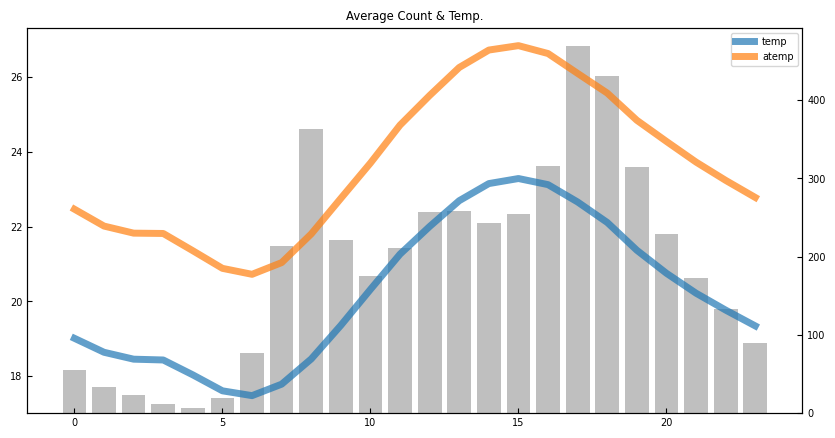

In [23]:
new_df = train.groupby('hour')[['count']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourtemp_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourtemp_mean.columns)

ax2 = ax1.twinx()
ax2.bar('hour', 'count', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Count & Temp.')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### b) `casual` and `temp`/`atemp` vs. `hours`

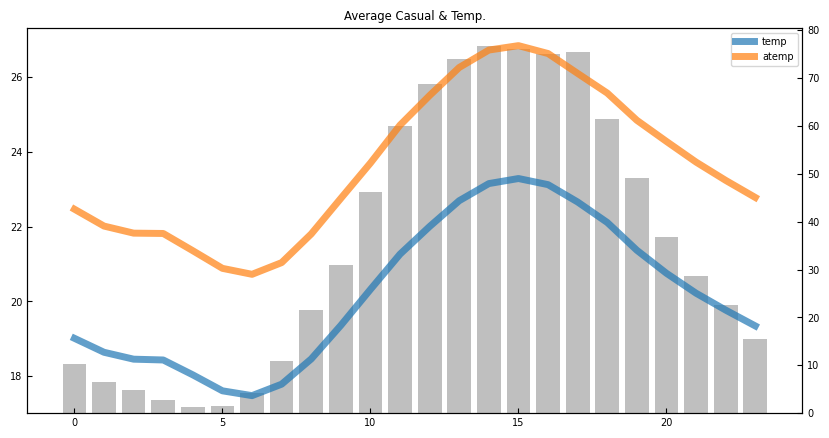

In [24]:
newdf = train.groupby('hour')[['casual']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourtemp_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourtemp_mean.columns)

ax2 = ax1.twinx()
ax2.bar('hour', 'casual', data=newdf, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Casual & Temp.')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### c) `count` and `humidity` vs. `hours`

In [25]:
hourhumid_mean = train.groupby(by = 'hour')[['humidity']].mean()
hourhumid_mean

,humidity
hour,
0,68.079121
1,69.581498
2,70.622768
3,72.293303
4,73.640271
5,73.409292
6,73.934066
7,72.292308
8,69.553846


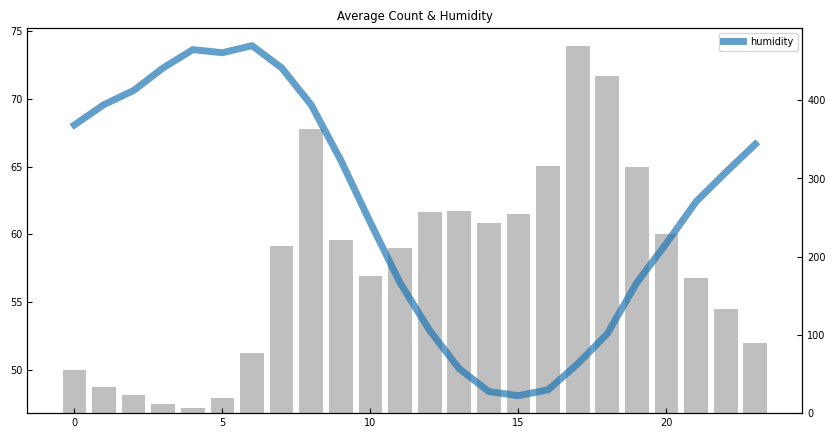

In [26]:
new_df = train.groupby('hour')[['count']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourhumid_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourhumid_mean.columns)

ax2 = ax1.twinx()
ax2.bar('hour', 'count', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Count & Humidity')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### d) `casual` and `humidity` vs. `hours`

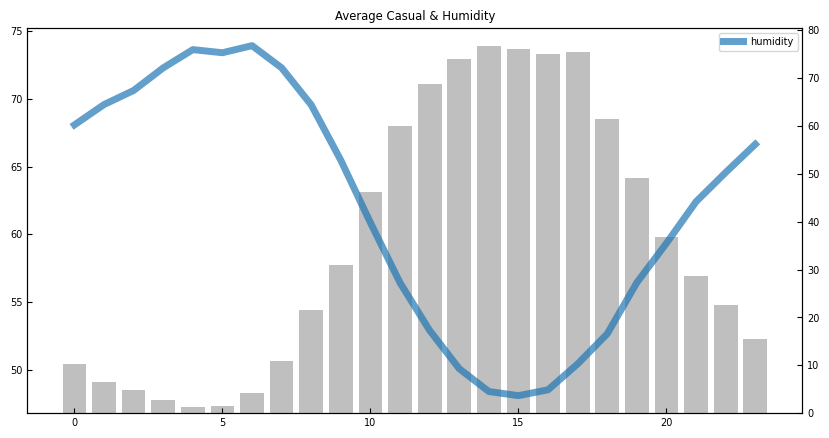

In [27]:
new_df = train.groupby('hour')[['casual']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourhumid_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourhumid_mean.columns)

ax2 = ax1.twinx()
ax2.bar('hour', 'casual', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Casual & Humidity')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### e) `count` and `windspeed` vs. `hours` 

In [28]:
hourwind_mean = train.groupby(by = 'hour')[['windspeed']].mean()
hourwind_mean

,windspeed
hour,
0,10.701564
1,10.418839
2,10.125315
3,10.173416
4,10.717605
5,10.062407
6,10.433402
7,10.879283
8,11.787155


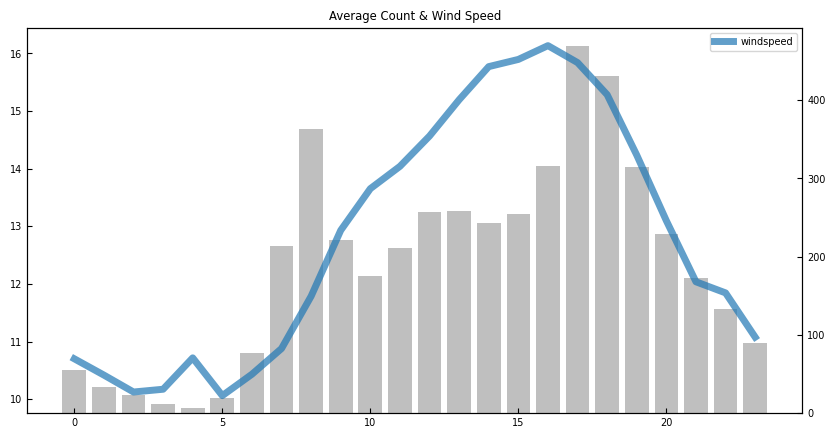

In [29]:
new_df = train.groupby('hour')[['count']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourwind_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourwind_mean.columns)

ax2 = ax1.twinx()
ax2.bar('hour', 'count', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Count & Wind Speed')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### f) `casual` and `windspeed` vs. `hours` 

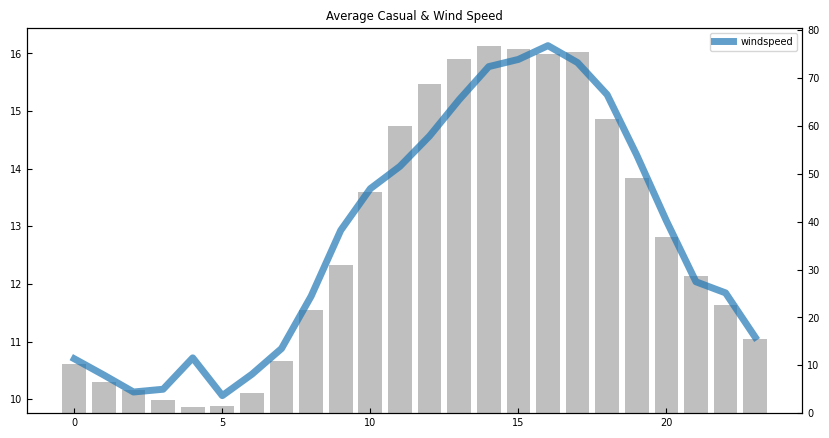

In [30]:
new_df = train.groupby('hour')[['casual']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourwind_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourwind_mean.columns)

ax2 = ax1.twinx()
ax2.bar('hour', 'casual', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Casual & Wind Speed')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

## 5. The relationship Between Month and Rental Count

### a) `count` vs. `month` of different `day_type`, `season`, `weather`, and `dayofweek`

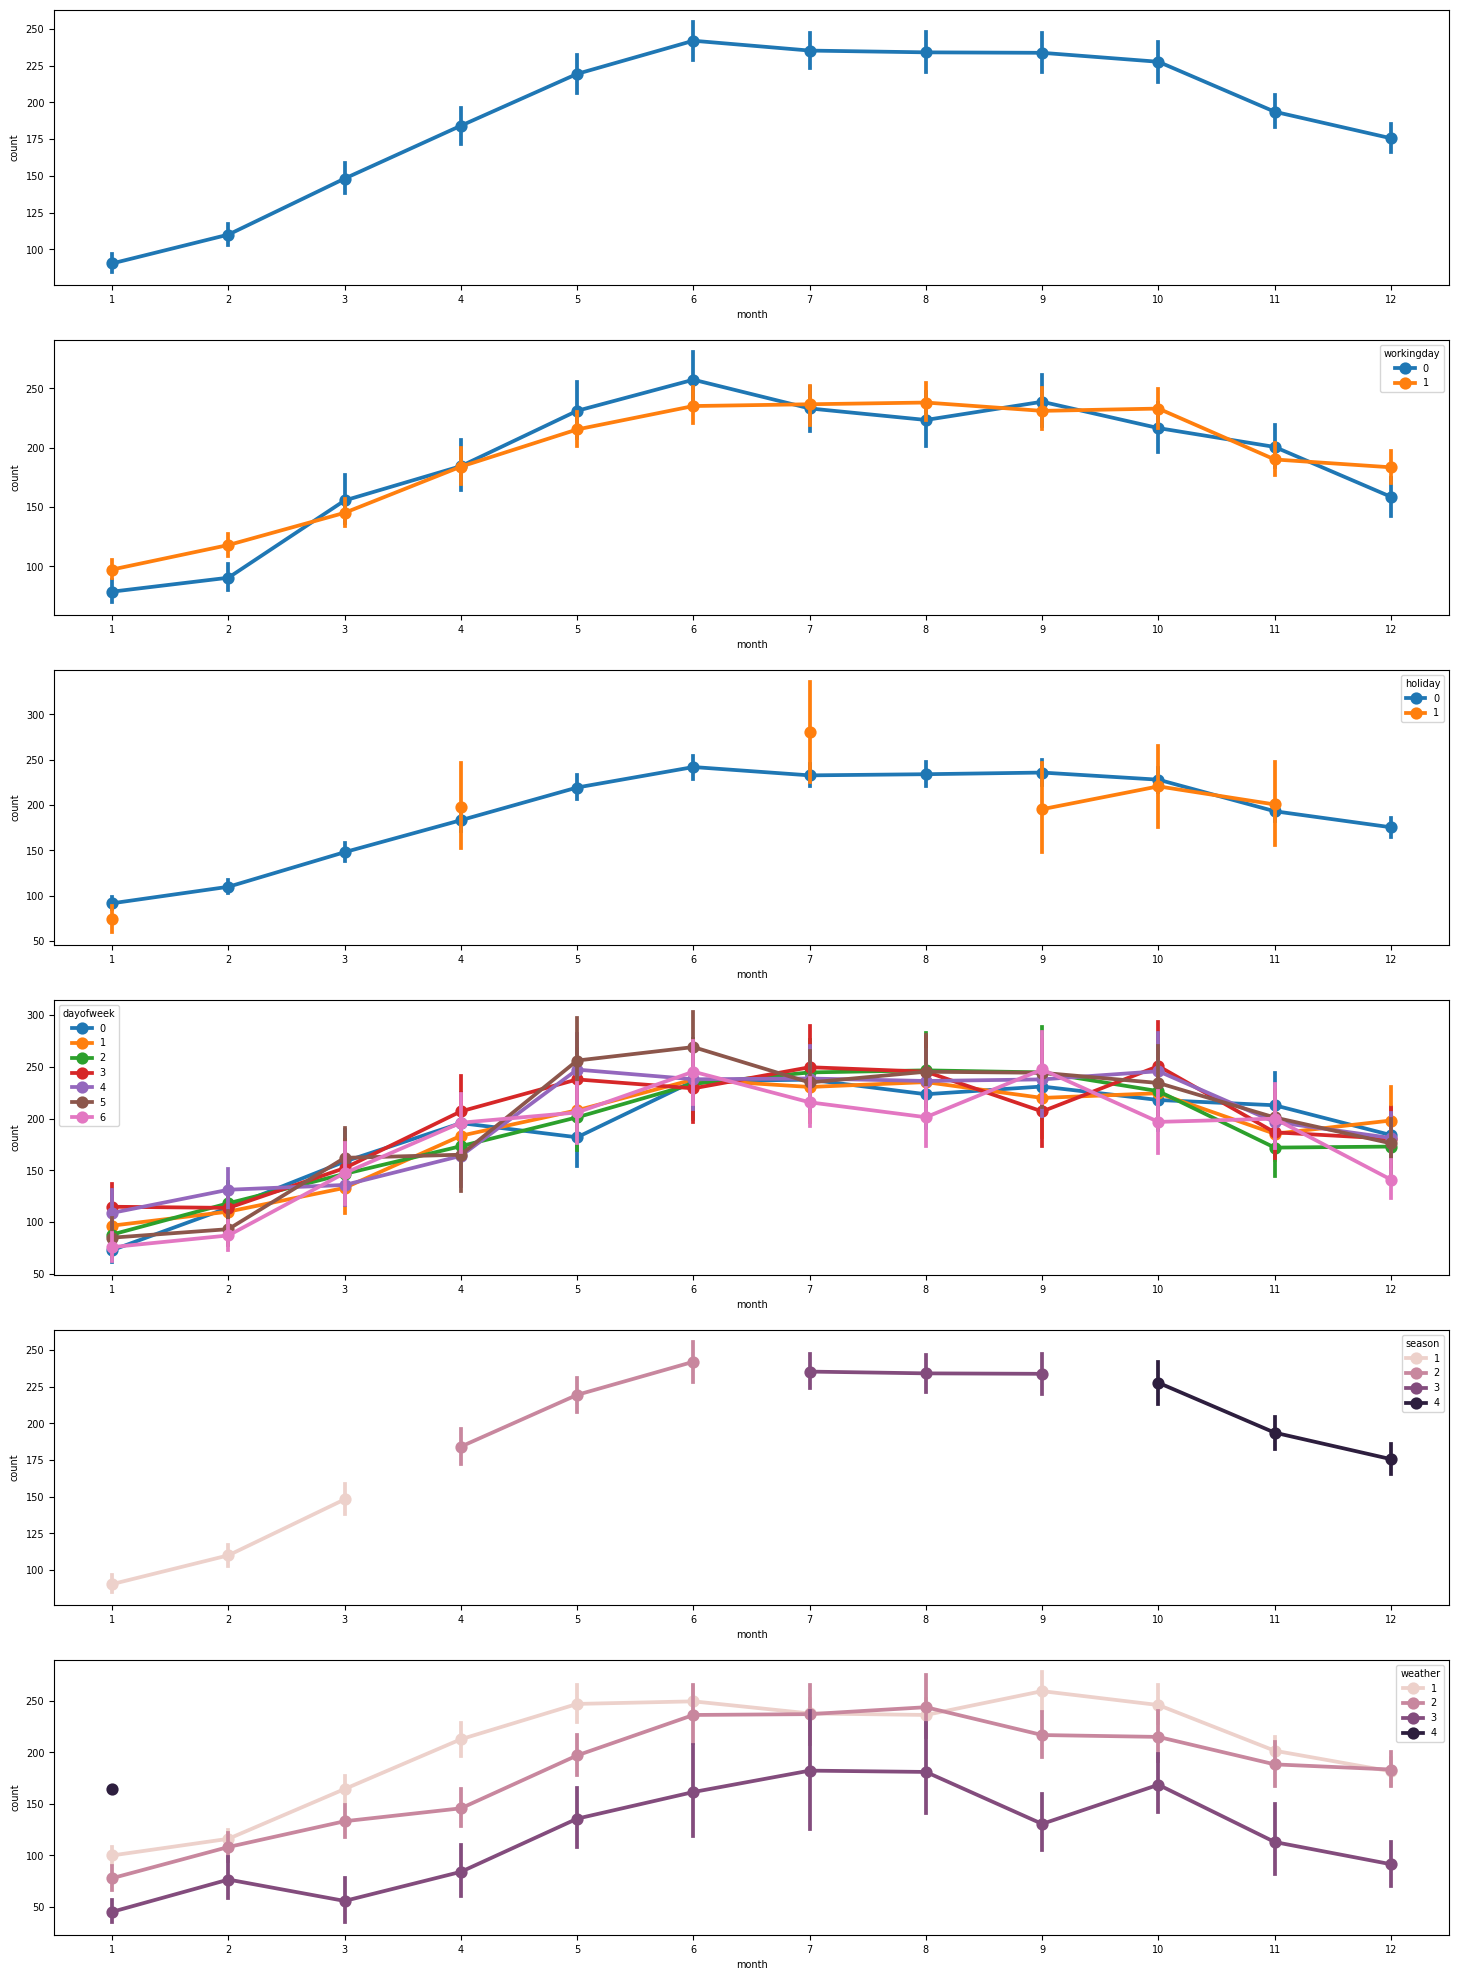

In [33]:
fig, axs = plt.subplots(6, 1, figsize = (18,25))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()

sns.pointplot(x = 'month', y = 'count', data = train, ax = ax1)
sns.pointplot(x = 'month', y = 'count', hue = 'workingday', data = train, ax = ax2)
sns.pointplot(x = 'month', y = 'count', hue = 'holiday', data = train, ax = ax3)
sns.pointplot(x = 'month', y = 'count', hue = 'dayofweek', data = train, ax = ax4, palette='tab10')
sns.pointplot(x = 'month', y = 'count', hue = 'season', data = train, ax = ax5)
sns.pointplot(x = 'month', y = 'count', hue = 'weather', data = train, ax = ax6)

plt.show()

### b) `casual` vs. `month` of different `day_type`, `season`, `weather`, and `dayofweek`

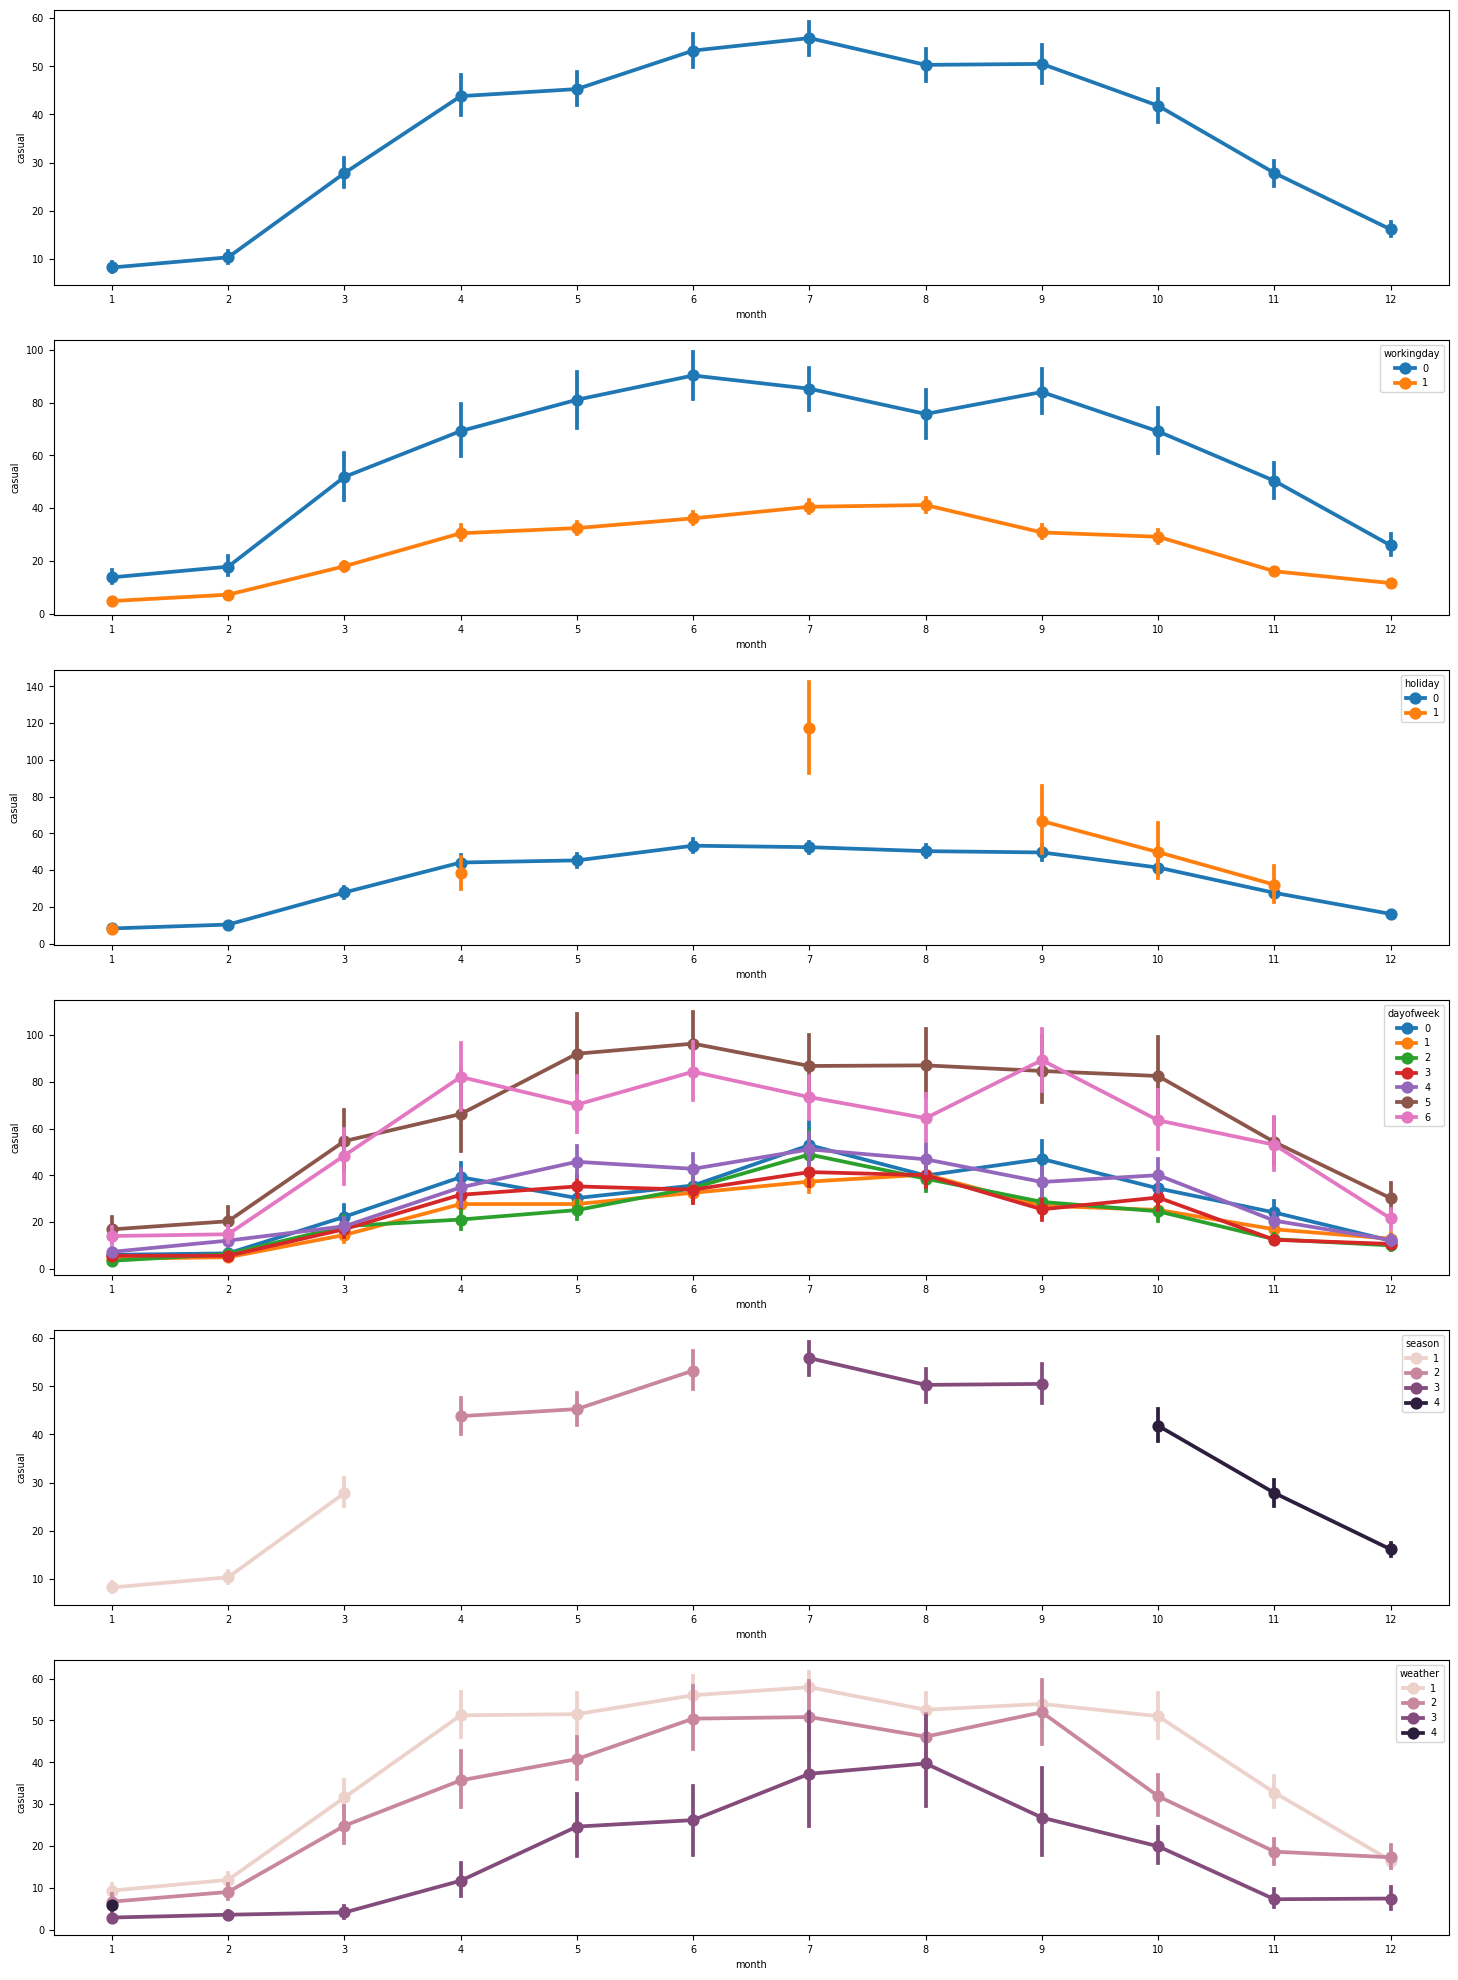

In [34]:
fig, axs = plt.subplots(6, 1, figsize = (18,25))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()

sns.pointplot(x = 'month', y = 'casual', data = train, ax = ax1)
sns.pointplot(x = 'month', y = 'casual', hue = 'workingday', data = train, ax = ax2)
sns.pointplot(x = 'month', y = 'casual', hue = 'holiday', data = train, ax = ax3)
sns.pointplot(x = 'month', y = 'casual', hue = 'dayofweek', data = train, ax = ax4, palette='tab10')
sns.pointplot(x = 'month', y = 'casual', hue = 'season', data = train, ax = ax5)
sns.pointplot(x = 'month', y = 'casual', hue = 'weather', data = train, ax = ax6)

plt.show()

Analysis
1. there are more rentals from May to October overall
2. There is a clear difference between `holiday` and `workingday` for non-registered users

### c) `count` and `temp`/`atemp` vs. `month`

In [36]:
hourtemp_mean = train.groupby(by = 'month')[['temp', 'atemp']].mean()
hourtemp_mean

,temp,atemp
month,,
1,9.840000,12.077579
2,11.798535,14.532608
3,15.902175,19.017220
4,18.718372,22.305891
5,22.674079,26.632374
6,27.064496,30.988750
7,30.841711,34.900395
8,29.736689,33.122001
9,25.779032,29.590248


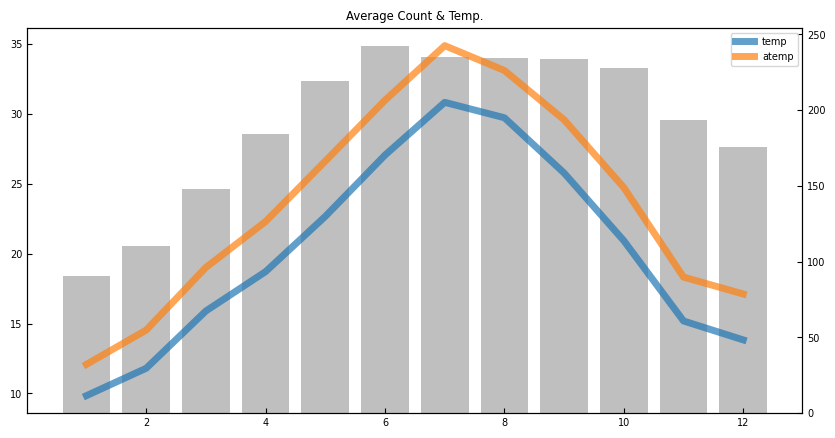

In [37]:
new_df = train.groupby('month')[['count']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourtemp_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourtemp_mean.columns)

ax2 = ax1.twinx()
ax2.bar('month', 'count', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Count & Temp.')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### d) `casual` and `temp`/`atemp` vs. `hours`

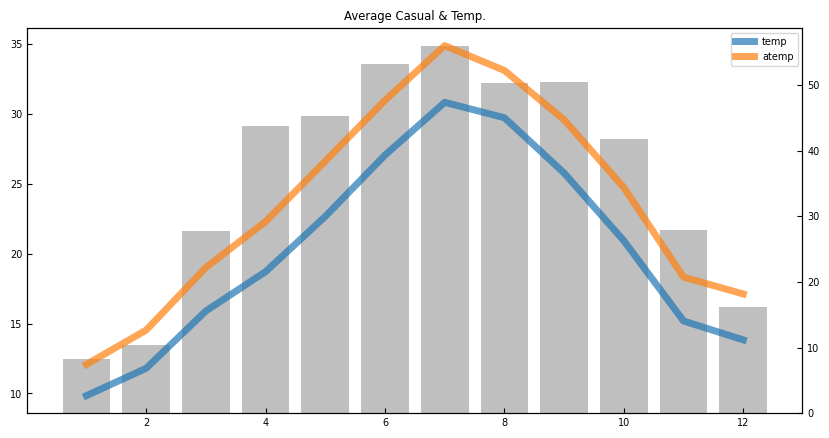

In [38]:
newdf = train.groupby('month')[['casual']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourtemp_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourtemp_mean.columns)

ax2 = ax1.twinx()
ax2.bar('month', 'casual', data=newdf, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Casual & Temp.')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### e) `count` and `humidity` vs. `month`

In [40]:
hourhumid_mean = train.groupby(by = 'month')[['humidity']].mean()
hourhumid_mean

,humidity
month,
1,55.911765
2,56.296337
3,56.678135
4,55.697470
5,68.084430
6,58.759868
7,58.402412
8,63.010965
9,70.980198


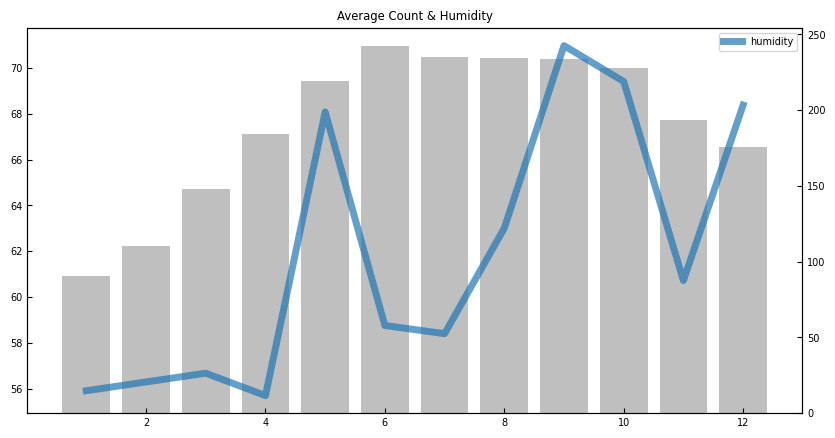

In [41]:
new_df = train.groupby('month')[['count']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourhumid_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourhumid_mean.columns)

ax2 = ax1.twinx()
ax2.bar('month', 'count', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Count & Humidity')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### f) `casual` and `humidity` vs. `hours`

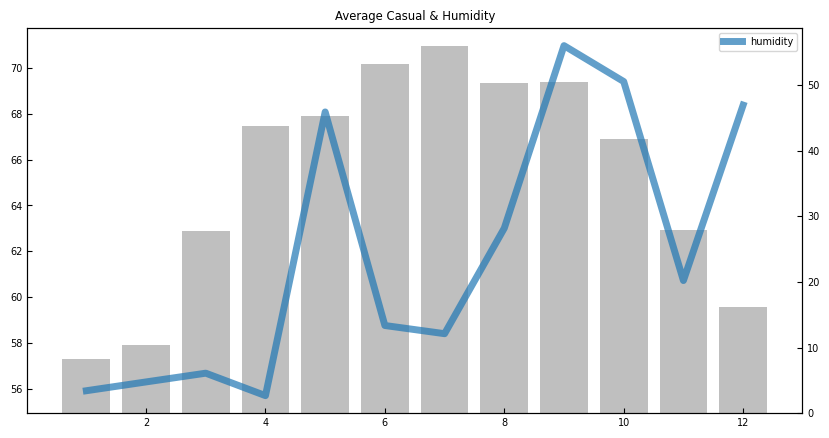

In [43]:
new_df = train.groupby('month')[['casual']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourhumid_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourhumid_mean.columns)

ax2 = ax1.twinx()
ax2.bar('month', 'casual', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Casual & Humidity')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### g) `count` and `windspeed` vs. `month` 

In [46]:
hourwind_mean = train.groupby(by = 'month')[['windspeed']].mean()
hourwind_mean

,windspeed
month,
1,14.582959
2,13.963707
3,15.363249
4,15.581090
5,12.293956
6,12.348930
7,11.019928
8,11.931179
9,11.575698


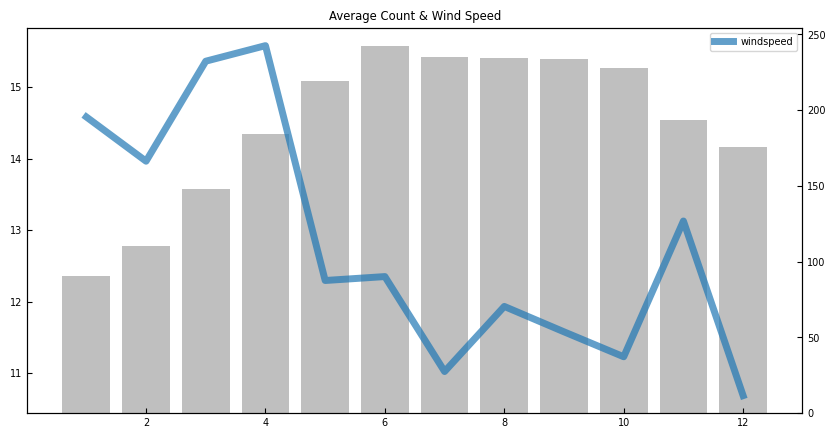

In [47]:
new_df = train.groupby('month')[['count']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourwind_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourwind_mean.columns)

ax2 = ax1.twinx()
ax2.bar('month', 'count', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Count & Wind Speed')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

### h) `casual` and `windspeed` vs. `month` 

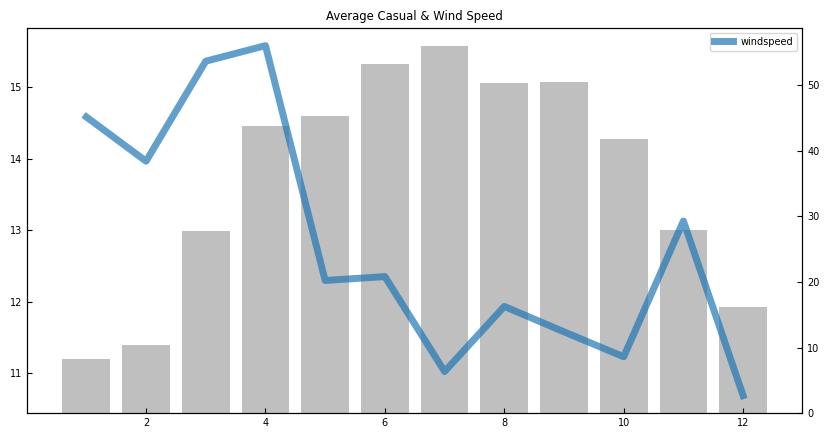

In [48]:
new_df = train.groupby('month')[['casual']].mean().reset_index()

fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(hourwind_mean, linewidth=5, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.legend(hourwind_mean.columns)

ax2 = ax1.twinx()
ax2.bar('month', 'casual', data=new_df, color = 'gray', alpha = 0.5)
ax2.tick_params(axis='y', direction='in')
ax2.set_title('Average Casual & Wind Speed')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)